<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Домашнее задание 6: параметрические тесты
</center>

**ФИО:** Хоменко Павел Михайлович

## Общая информация

__Дата выдачи:__ 23.04.2025

__Дедлайн:__ 23:59MSK 11.05.2025

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### Задача №1: Лучше найди себе девушку! (25 баллов)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [ ]:
df = pd.read_csv('dating_is_hard.csv')

__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   object
 1   age               1000 non-null   int64 
 2   is_heavy_drinker  1000 non-null   bool  
 3   height            1000 non-null   int64 
 4   sex               1000 non-null   object
 5   smokes            1000 non-null   bool  
 6   location          1000 non-null   object
 7   offspring         1000 non-null   object
dtypes: bool(2), int64(2), object(4)
memory usage: 49.0+ KB


По данным интернета средний рост в США:
- мужчины - 1.77 метра (или 69,68 дюймов)
- женщины - 1.63 метра (или 64,17 дюймов)

https://www.worlddata.info/average-bodyheight.php#:~:text=Average%20sizes%20of%20men%20and,a%20height%20of%201.63%20m.

<Axes: xlabel='height', ylabel='Count'>

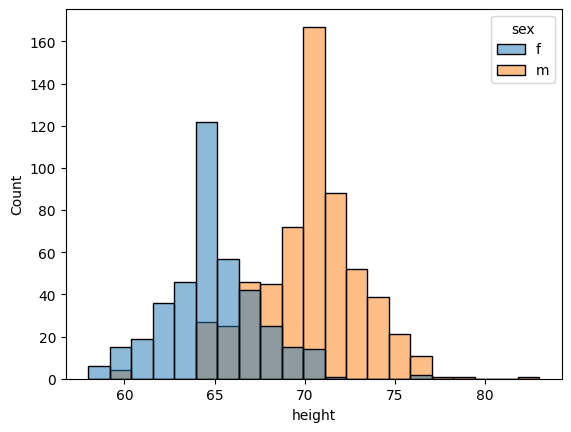

In [ ]:
sns.histplot(data=df, x='height', hue='sex')

<Axes: xlabel='height', ylabel='sex'>

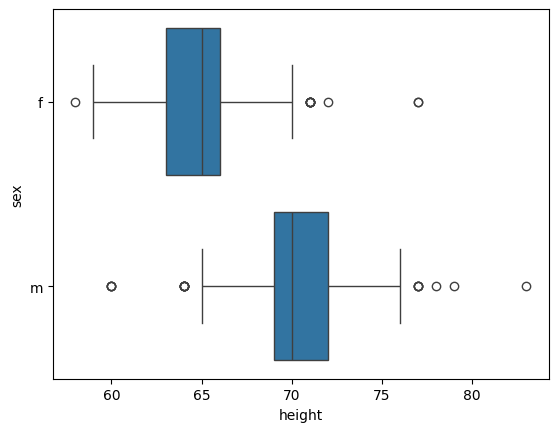

In [ ]:
sns.boxplot(x=df.height, y=df.sex)

В данных имеется небольшая доля выбросов, но сами выборсы "несильные", такие значения роста можно встретить в реальности. При размере выборки ~1000 влияние небольшого количества "несильных" выбросов нивелируется за счет ЦПТ. Для большей уверенности проверим смещение средних. Если оно отсутствует - смело используем z-тест.

In [ ]:
print(f"Средний рост мужчины: {df[df['sex'] == 'm']['height'].mean():.2f}")
print(f"Медианный рост мужчины: {df[df['sex'] == 'm']['height'].median():.2f}")
print(f"Мода роста мужчины: {df[df['sex'] == 'm']['height'].mode().values[0]:.2f}")

Средний рост мужчины: 70.30
Медианный рост мужчины: 70.00
Мода роста мужчины: 70.00


In [ ]:
print(f"Средний рост девушки: {df[df['sex'] == 'f']['height'].mean():.2f}")
print(f"Медианный рост девушки: {df[df['sex'] == 'f']['height'].median():.2f}")
print(f"Мода роста девушки: {df[df['sex'] == 'f']['height'].mode().values[0]:.2f}")

Средний рост девушки: 64.83
Медианный рост девушки: 65.00
Мода роста девушки: 64.00


In [ ]:
65 / 64 - 1

0.015625

Критического смещения средних нет ни для мужчин, ни для женщин. При n = 1 000 можно использовать z-тест для проверки гипотезы о средних.

Сформулируем гипотезы. Вероятно, мужчины склонны завышать рост. Есть какой-то стереотип, что высокие мужчины более привлекательны для женщин. Поэтому у мужчины будем использовать правосторонний критерий, гипотезы для мужчин будут выглядеть следующим образом:
- H0 - средний рост в приложении не выше реального среднего роста мужчины
- H1 - средний рост в приложении выше реального среднего роста

У девушек сложно выдвинуть априорное предположение о росте, поэтому будем использовать двухсторонний критерий. Гипотезы будут следующими:
- H0 - средний рост в приложении не отличается реального среднего роста мужчины
- H1 - средний рост в приложении отличается от реального среднего роста

Уровень статистической значимости зададим 0.05.

In [ ]:
# чтобы лучше запоминить я решил не писать функцию, а посчитать руками
mean_male_app = df[df['sex'] == 'm']['height'].mean()
mean_male_true = 69.68
std_male_app = df[df['sex'] == 'm']['height'].std()

z_obs = (mean_male_app - mean_male_true) / std_male_app

z_crit = sts.norm().ppf(1 - 0.05)

p_value = 1 - sts.norm().cdf(z_obs)

print(f"Наблюдаемое значение z-статистики: {z_obs:.2f}")
print(f"Теоретическое значение z-статистики: {z_crit:.2f}")
print(f"Наблюдаемый уровень статистической значимости: {p_value:.2f}")

Наблюдаемое значение z-статистики: 0.22
Теоретическое значение z-статистики: 1.64
Наблюдаемый уровень статистической значимости: 0.41


In [ ]:
# аналогично для девушек
mean_female_app = df[df['sex'] == 'f']['height'].mean()
mean_female_true = 69.68
std_female_app = df[df['sex'] == 'f']['height'].std()

z_obs = (mean_female_app - mean_female_true) / std_female_app

p_value = 2 * (1 - sts.norm().cdf(np.abs(z_obs)))

z_crit = sts.norm().ppf(1 - 0.05/2)

print(f"Наблюдаемое значение z-статистики: {z_obs:.2f}")
print(f"Теоретическое значение z-статистики: {z_crit:.2f}")
print(f"Наблюдаемый уровень статистической значимости: {p_value:.2f}")

Наблюдаемое значение z-статистики: -1.79
Теоретическое значение z-статистики: 1.96
Наблюдаемый уровень статистической значимости: 0.07


In [ ]:
# проведем левосторонний тест для девушек

p_value = sts.norm().cdf(z_crit_obs)
z_crit = -sts.norm().ppf(1 - 0.05)

print(f"Наблюдаемое значение z-статистики: {z_crit_obs:.2f}")
print(f"Теоретическое значение z-статистики: {z_crit:.2f}")
print(f"Наблюдаемый уровень статистической значимости: {p_value:.2f}")

Наблюдаемое значение z-статистики: -1.79
Теоретическое значение z-статистики: -1.64
Наблюдаемый уровень статистической значимости: 0.04


__Вывод:__
- мужчины склонны указывать реальный рост - наблюдаемое значение z-критерия для мужчин говорит о том, что средний рост мужчины в приложении соответствует среднему росту в реальной жизни (наблюдаемое z = 0.22 при любой направленности теста приведет к неотклонению нулевой гипотезы)
- при этом девушки склонны занижать свой рост - средний рост в приложении ниже, чем реальный. Z-критерий -1.79, наблюдаемый уровень статистической значимости 0.04. Возможно девушки хотят соответственовать неким стереотипам о хрупкости и женственности.

__б) [10 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

In [ ]:
share_male = df[(df['sex'] == 'm') & (df['is_heavy_drinker'] == True)]['sex'].count() / df[df['sex'] == 'm']['sex'].count()
share_female = df[(df['sex'] == 'f') & (df['is_heavy_drinker'] == True)]['sex'].count() / df[df['sex'] == 'm']['sex'].count()

float(share_male), float(share_female)

(0.085, 0.051666666666666666)

In [ ]:
float(share_male) / float(share_female) - 1

0.6451612903225807

В целом, невооруженным глазом видно, что автор задания прав. Сформулируем 2 гипотезы:
- H0: доля алкоголиков мужчины не превышает долю алкоголиков женщин
- H1: доля алкоголиков мужчины выше, чем доля алкоголиков женщин

In [ ]:
diff = share_male - share_female
n_male, n_female = df[df['sex'] == 'm']['sex'].count(), df[df['sex'] == 'f']['sex'].count()
m_male = df[(df['sex'] == 'm') & (df['is_heavy_drinker'] == True)]['sex'].count()
m_female = df[(df['sex'] == 'f') & (df['is_heavy_drinker'] == True)]['sex'].count()

P = (m_male + m_female)/(n_male + n_female)
diff_std = np.sqrt(P*(1 - P)*(1/n_male + 1/n_female))

z_obs = diff/diff_std
z_crit = sts.norm.ppf(1 - 0.05)

print(f"Наблюдаемое значение z-статистики: {z_obs:.2f}")
print(f"Теоретическое значение z-статистики: {z_crit:.2f}")

Наблюдаемое значение z-статистики: 1.88
Теоретическое значение z-статистики: 1.64


__Вывод:__ поскольку z-наблюдаемое > z-крит, нулевая гипотеза отклоняется. Доля алкоголиков-мужчин действительно больше доли алкоголиков среди женщин.

__в) [10 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

In [ ]:
share_drink = df[(df['smokes'] == True) & (df['is_heavy_drinker'] == True)]['smokes'].count() / df[df['is_heavy_drinker'] == True]['smokes'].count()
share_non_drink = df[(df['smokes'] == True) & (df['is_heavy_drinker'] == False)]['smokes'].count() / df[df['is_heavy_drinker'] == False]['smokes'].count()

float(share_drink), float(share_non_drink)

(0.4268292682926829, 0.3888888888888889)

В целом видно, что доли сильно не отличаются. Проверим это статистическим тестом.

Сформулируем 2 гипотезы:
- H0: доля курящих среди алкоголиков не выше, чем среди не алкоголиков
- H1: доля курящих среди алкоголиков выше, чем среди не алкоголиков

Для проверки используем правосторонний z-тест для разности долей.

In [ ]:
m_drink = df[(df['smokes'] == True) & (df['is_heavy_drinker'] == True)]['smokes'].count()
m_non_drink = df[(df['smokes'] == True) & (df['is_heavy_drinker'] == False)]['smokes'].count()

n_drink, n_non_drink = df[df['is_heavy_drinker'] == True]['smokes'].count(), df[df['is_heavy_drinker'] == False]['smokes'].count()

diff = share_drink - share_non_drink

P = (m_drink + m_non_drink)/(n_drink + n_non_drink)
diff_std = np.sqrt(P*(1 - P)*(1/n_drink + 1/n_non_drink))

z_obs = diff/diff_std
z_crit = sts.norm.ppf(1 - 0.05)

print(f"Наблюдаемое значение z-статистики: {z_obs:.2f}")
print(f"Теоретическое значение z-статистики: {z_crit:.2f}")

Наблюдаемое значение z-статистики: 0.67
Теоретическое значение z-статистики: 1.64


**Вывод:** поскольку z-наблюдаемое ниже z-крит, нулевая гипотеза не отвергается. Для курящих среди алкоголиков не превышает долю курящих среди неалкоголиков.

### Задача №2. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:**
1. Сделать более крупные фотографии самого отеля
2. Сделать фотографии разных номеров (стандарт, люкс и тп)
3. Выводить оценку и наиболее популярные отзывы об отеле
4. Вывести преимущества отеля (1я линия, аквапарк для детей, wifi в номере и тп)

В целом, на мой взгляд можно сделать бронирование не со страницы отеля, а непосредственно в выдаче. Для этого на странице выдачи надо выводить ключевую информацию об отеле.

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [3]:
df = pd.read_csv("ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

In [124]:
df.duplicated().sum()

np.int64(0)

In [125]:
df.isna().sum().sum()

np.int64(0)

In [126]:
df.group.value_counts()

,count
group,
test,201935
control,199872


In [127]:
df.groupby(['group','sex']).size()

group    sex
control  0       99991
         1       99881
test     0      100915
         1      101020
dtype: int64

In [128]:
df['datetime'] = pd.to_datetime(df['datetime'])

<ipython-input-128-a963c6478daf>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])


In [129]:
df[df['group'] == 'control']['datetime'].min(), df[df['group'] == 'control']['datetime'].max()

(Timestamp('2023-11-01 01:01:00'), Timestamp('2023-11-15 23:58:00'))

In [130]:
df[df['group'] == 'test']['datetime'].min(), df[df['group'] == 'test']['datetime'].max()

(Timestamp('2024-04-23 20:30:00'), Timestamp('2024-05-02 23:58:00'))

In [131]:
df.groupby(['group', 'district']).size().groupby(level=0).apply(lambda x: x / x.sum() * 100)

group    group    district                         
control  control  Дальневосточный федеральный округ     1.000140
                  Приволжский федеральный округ        12.000180
                  Северо-Западный федеральный округ    19.999800
                  Сибирский федеральный округ           3.999560
                  Уральский федеральный округ           2.999920
                  Центральный федеральный округ        40.000100
                  Южный федеральный округ              20.000300
test     test     Дальневосточный федеральный округ     2.999975
                  Приволжский федеральный округ        17.999851
                  Северо-Западный федеральный округ     5.000124
                  Сибирский федеральный округ           4.000297
                  Уральский федеральный округ           9.999752
                  Центральный федеральный округ        20.000000
                  Южный федеральный округ              40.000000
dtype: float64

In [132]:
df[(df['payment_page'] == 0) & (df['payment'] == 1)].size

274212

In [133]:
df[(df['payment_page'] == 0) & (df['payment'] == 1)].size / df.size * 100

7.5827449496897765

In [134]:
df[(df['payment_page'] == 0) & (df['payment'] == 1)].groupby(['group', 'district'])['payment_page'].count()

group    district                         
control  Дальневосточный федеральный округ     414
         Приволжский федеральный округ        2413
         Северо-Западный федеральный округ    2987
         Сибирский федеральный округ          1378
         Уральский федеральный округ           844
         Центральный федеральный округ        2028
         Южный федеральный округ              2073
test     Дальневосточный федеральный округ    1587
         Приволжский федеральный округ        4192
         Северо-Западный федеральный округ     928
         Сибирский федеральный округ          1820
         Уральский федеральный округ          3703
         Центральный федеральный округ         912
         Южный федеральный округ              5189
Name: payment_page, dtype: int64

__Ответ:__ АБ тест проводился некорректно.
1. Мы видим, что период для контрольной группы был с 1 по 15 ноября 2023, а для тестовой с 23 апреля по 2 мая 2024. Эксперимент для контрольной и тестовой группы должен проводиться одновременно, либо максимлаьно близко по времени, особенно в сфере бронирования отелей, ввиду влияния сезонного фактора.
2. В выборке имеется 274212 пользователей (7,6% выборки), которые оплатили отель онлайн не посещая страницу оплаты. Пока не понятно, с чем это связано. Возможно система фиксации посещения страницы оплаты не срабатывала корректно, либо пользователь платил без посещания страницы оплаты, непосредственно через мобильный Mir Pay, либо мобильное приложение СБП и тп.
3. Регионы представлены несбалансированно, вероятно это также связано с большим интервалом времени между тестовой и контрольноый выборки: для весенних месяцев преобладают отели в южном федеральном округе (поскольку уже тепло и туристы едут в теплые регионы), для ноября - центрального и северо-западного (туристы едут в Москву, СПб, Петрозаводск и Мурманск - посмотреть северное сияние и тп)

In [135]:
# df = df[~((df['payment_page'] == 0) & (df['payment'] == 1))]

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

1. Анализ общей конверсии "посетители сайта -> оплата"

In [136]:
df.groupby(['group', 'district'])['payment'].mean()

group    district                         
control  Дальневосточный федеральный округ    0.232116
         Приволжский федеральный округ        0.252074
         Северо-Западный федеральный округ    0.251739
         Сибирский федеральный округ          0.246310
         Уральский федеральный округ          0.241161
         Центральный федеральный округ        0.250772
         Южный федеральный округ              0.249281
test     Дальневосточный федеральный округ    0.334764
         Приволжский федеральный округ        0.334516
         Северо-Западный федеральный округ    0.332079
         Сибирский федеральный округ          0.330280
         Уральский федеральный округ          0.330114
         Центральный федеральный округ        0.331220
         Южный федеральный округ              0.336395
Name: payment, dtype: float64

In [137]:
df.groupby(['group'])['payment'].mean()

,payment
group,
control,0.250170
test,0.333885


__Ответ:__ Видно, что совокупная конверсия (посетили страницу отеля -> оплатили) выросла как в разрезе регионов, так и в общем.

2. Анализ конверсии этапа "посетили страницу отеля - посетили страницу оплаты"

In [138]:
conversion_group_district = df.groupby(['group', 'district']).agg(
    total_users=('payment_page', 'count'),
    visited=('payment_page', lambda x: (x == 1).sum())
).reset_index()

conversion_group_district['conversion'] = conversion_group_district['visited'] / conversion_group_district['total_users']
conversion_group_district

,group,district,total_users,visited,conversion
0,control,Дальневосточный федеральный округ,1999,200,0.100050
1,control,Приволжский федеральный округ,23985,14391,0.600000
2,control,Северо-Западный федеральный округ,39974,27982,0.700005
3,control,Сибирский федеральный округ,7994,2398,0.299975
4,control,Уральский федеральный округ,5996,2398,0.399933
5,control,Центральный федеральный округ,79949,71954,0.899999
6,control,Южный федеральный округ,39975,31980,0.800000
7,test,Дальневосточный федеральный округ,6058,1212,0.200066
8,test,Приволжский федеральный округ,36348,23626,0.649994
9,test,Северо-Западный федеральный округ,10097,7270,0.720016


In [7]:
conversion_group = df.groupby('group').agg(
    total_users=('payment_page', 'count'),
    visited=('payment_page', lambda x: (x == 1).sum())
).reset_index()

conversion_group['conversion'] = conversion_group['visited'] / conversion_group['total_users']
conversion_group

,group,total_users,visited,conversion
0,control,199872,151303,0.756999
1,test,201935,146767,0.726803


__Ответ:__ Видно, что несмотря на рост конверсии по всем регионам в отдельности, совокупный показатель конверсии упал. Парадоксальный результат.

3. Анализ конверсии этапа "страница оплаты -> платеж"

In [16]:
df_payment_page = df[df['payment_page'] == 1]

conversion_pay_district = df_payment_page.groupby(['group', 'district']).agg(
    total_users=('payment_page', 'count'),
    visited=('payment', lambda x: (x == 1).sum())
).reset_index()

conversion_pay_district['conversion'] = conversion_pay_district['visited'] / conversion_pay_district['total_users']
conversion_pay_district

,group,district,total_users,visited,conversion
0,control,Дальневосточный федеральный округ,200,50,0.250000
1,control,Приволжский федеральный округ,14391,3633,0.252449
2,control,Северо-Западный федеральный округ,27982,7076,0.252877
3,control,Сибирский федеральный округ,2398,591,0.246455
4,control,Уральский федеральный округ,2398,602,0.251043
5,control,Центральный федеральный округ,71954,18021,0.250452
6,control,Южный федеральный округ,31980,7892,0.246779
7,test,Дальневосточный федеральный округ,1212,441,0.363861
8,test,Приволжский федеральный округ,23626,7967,0.337213
9,test,Северо-Западный федеральный округ,7270,2425,0.333563


In [17]:
conversion_paym = df_payment_page.groupby('group').agg(
    total_users=('payment_page', 'count'),
    visited=('payment', lambda x: (x == 1).sum())
).reset_index()

conversion_paym['conversion'] = conversion_paym['visited'] / conversion_paym['total_users']
conversion_paym

,group,total_users,visited,conversion
0,control,151303,37865,0.250259
1,test,146767,49092,0.334489


__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

Анализ воронки также сделаем как в совокупности, так и по двум этапам.

1. Анализ общей конверсии.

Сформулируем две гипотезы:
- H0: совокупная конверсия не увеличилась после изменения дизайна страницы
- H1: совокупная конверсия увеличилась после изменения дизайна страницы

Для оценки используем правосторонний z-критерий

In [6]:
mean_control = df[df['group'] == 'control']['payment'].mean()
mean_test = df[df['group'] == 'test']['payment'].mean()

n_control, n_test = df[df['group'] == 'control']['payment'].count(), df[df['group'] == 'control']['payment'].count()
m_control, m_test = df[df['group'] == 'test']['payment'].sum(), df[df['group'] == 'test']['payment'].sum()

diff = mean_test - mean_control

P = (m_control + m_test)/(n_test + n_control)
diff_std = np.sqrt(P*(1 - P)*(1/n_test + 1/n_control))

z_obs = diff/diff_std
z_crit = sts.norm.ppf(1 - 0.05)

print(f"Наблюдаемое значение z-статистики: {z_obs:.2f}")
print(f"Теоретическое значение z-статистики: {z_crit:.2f}")

Наблюдаемое значение z-статистики: 55.97
Теоретическое значение z-статистики: 1.64


__Вывод:__ Поскольку наблюдаемоей значение z-критерия выше критического, отклоняем нулевую гипотезу. Совокупная конверсия действительно увеличилась после изменения дизайна страницы.

2. Анализ конверсии на этапе "переход на страницу отеля - переход на страницу оплаты"

Учитывая, что предварительный анализ показал снижение конверсии имеет смысл сформулировать гипотезы следующим образом:
- H0: доля пользователей, посетивших страницу оплаты, не уменьшилась после изменения дизайна страницы отеля
- H1: доля пользователей, посетивших страницу оплаты, уменьшилась после изменения дизайна страницы отеля

Для проверки будем использовать левосторонниц z-тест.

In [9]:
mean_control = conversion_group[conversion_group['group'] == 'control']['conversion']
mean_control

,conversion
0,0.756999


In [14]:
mean_control = conversion_group[conversion_group['group'] == 'control']['conversion'].iloc[0]
mean_test = conversion_group[conversion_group['group'] == 'test']['conversion'].iloc[0]

n_control = conversion_group[conversion_group['group'] == 'control']['total_users'].iloc[0]
n_test = conversion_group[conversion_group['group'] == 'test']['total_users'].iloc[0]

m_control = conversion_group[conversion_group['group'] == 'control']['visited'].iloc[0]
m_test = conversion_group[conversion_group['group'] == 'test']['visited'].iloc[0]

diff = mean_test - mean_control

P = (m_control + m_test)/(n_test + n_control)
diff_std = np.sqrt(P*(1 - P)*(1/n_test + 1/n_control))

z_obs = diff/diff_std
z_crit = -sts.norm.ppf(1 - 0.05)

print(f"Наблюдаемое значение z-статистики: {z_obs:.2f}")
print(f"Теоретическое значение z-статистики: {z_crit:.2f}")

Наблюдаемое значение z-статистики: -21.87
Теоретическое значение z-статистики: -1.64


__Ответ:__ Поскольку наблюдаемое значение z-статистики ниже критического, нулевая гипотеза отклоняется. Конверсия пользователей на этапе посещения страницы оплаты снизилась после изменения дизайна страницы отеля.

3. Анализ конверсии на этапе "посещение страницы оплаты - оплата"

Сформулируем две гипотезы:
- H0: доля пользователей, оплативших после посещения страницы оплаты, после изменений не увеличилась
- H1: доля пользователей, оплативших после посещения страницы оплаты, после изменений увеличилась

Для оценки воспользуемся правосторонним z-критерием.

In [19]:
mean_control = conversion_paym[conversion_paym['group'] == 'control']['conversion'].iloc[0]
mean_test = conversion_paym[conversion_paym['group'] == 'test']['conversion'].iloc[0]

n_control = conversion_paym[conversion_paym['group'] == 'control']['total_users'].iloc[0]
n_test = conversion_paym[conversion_paym['group'] == 'test']['total_users'].iloc[0]

m_control = conversion_paym[conversion_paym['group'] == 'control']['visited'].iloc[0]
m_test = conversion_paym[conversion_paym['group'] == 'test']['visited'].iloc[0]

diff = mean_test - mean_control

P = (m_control + m_test)/(n_test + n_control)
diff_std = np.sqrt(P*(1 - P)*(1/n_test + 1/n_control))

z_obs = diff/diff_std
z_crit = sts.norm.ppf(1 - 0.05)

print(f"Наблюдаемое значение z-статистики: {z_obs:.2f}")
print(f"Теоретическое значение z-статистики: {z_crit:.2f}")

Наблюдаемое значение z-статистики: 50.58
Теоретическое значение z-статистики: 1.64


__Ответ:__ Поскольку наблюдаемое значение z-критерия выше критического, нулевая гипотеза отклоняется. Доля пользователей, оплативших после посещения страницы оплаты, после внесения изменений, увеличилась.

__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

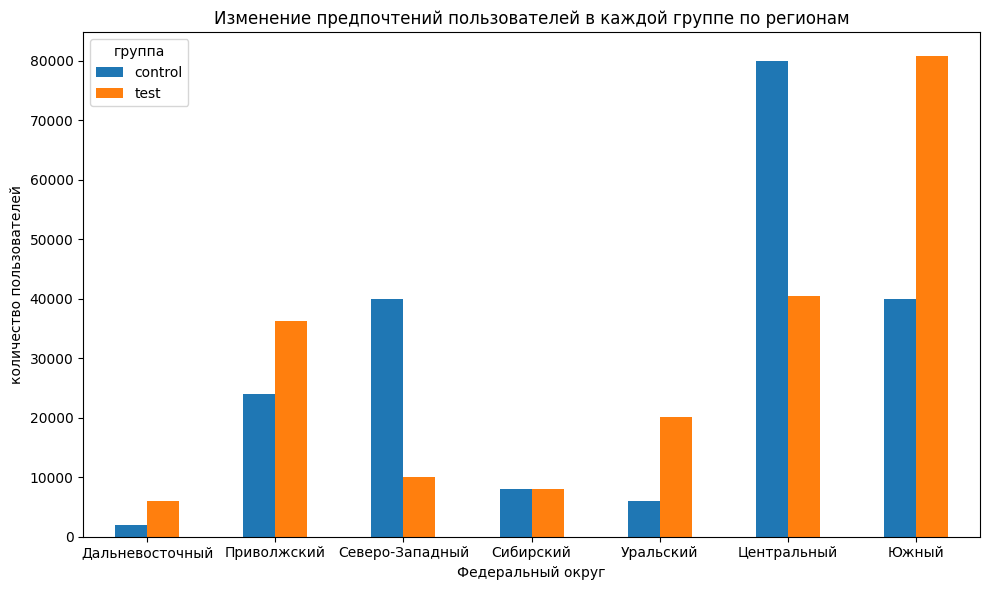

In [33]:
df_regions = df.groupby(['district', 'group']).size().unstack(fill_value=0)
df_regions.index = df_regions.index.str.split().str[0]
df_regions.plot(kind='bar', figsize=(10,6))
plt.xlabel('Федеральный округ')
plt.ylabel('количество пользователей')
plt.title('Изменение предпочтений пользователей в каждой группе по регионам')
plt.xticks(rotation=0)
plt.legend(title='группа')
plt.tight_layout()
plt.show()

__Ответ:__ Как собственно и отмечал ранее, на распределение регионов существенно повлиял сезонный фактор. В тестовой группе чаще интересовались отелями на юге, поскольку эксперимент проводился поздней весной. В контрольной группе преобладали ЦФО и СЗФО, поскольку на ноябрьские праздники туристы предпочитают лететь в Москву и СПб.

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'>

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:** Действительно, мы получили протеворечивые результаты для конверсии на этапе "посещение страницы отеля - посещение страницы оплаты": если смотреть в разрезе по регионам, то конверсия растёт, если смотреть в совокупности - конверсия падает.

По всей видимости это связано с недостатками дизайна АБ-теста. В частности, репрезентативность регионов как по долям та и по количеству существенно отличается в тестовой и контрольной группе. Поскольку эксперимент в тестовой группе проводился весной - там пользователи предпочитали отели на юге, а эксперимент в контрольной группе - в ноябре. В ноябрьские праздники пользователи предпочитают посещать на праздники Москву, СПб.

В итоге мы получили практически классический пример парадокса Симпсона.

## Задача №3: Не подглядывать! (50 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов.

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов.

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны.

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [2]:
mde, std_a, std_b, a, b = 5, 40, 20, 0.05, 0.2
z_a, z_b = sts.norm.ppf(1 - a/2), sts.norm.ppf(1 - b)

n_one_group = (std_a ** 2 + std_b ** 2) * ((z_a + z_b) ** 2) / mde ** 2
n_two_group = 2 * n_one_group
days = int(np.ceil(n_two_group / 200))
days

7

__Ответ:__ Эксперимент нужно проводить 7 дней.

__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [18]:
A = sts.norm.rvs(loc=100, scale=40, size=200 * 7)
B = sts.norm.rvs(loc=105, scale=20, size=200 * 7)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста:
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [8]:
A = sts.norm.rvs(loc=100, scale=40, size=200 * 50)
B = sts.norm.rvs(loc=105, scale=20, size=200 * 50)

sample = {
    'day': [],
    'mean_A': [],
    'mean_B': [],
    'p-value': []
}

for day in range(1, 51):
    A_daily = A[:day * 200]
    B_daily = B[:day * 200]

    mean_A = np.mean(A_daily)
    mean_B = np.mean(B_daily)

    _, p_value = sts.ttest_ind(A_daily, B_daily)

    sample['day'].append(day)
    sample['mean_A'].append(mean_A)
    sample['mean_B'].append(mean_B)
    sample['p-value'].append(p_value)

df_sample = pd.DataFrame(sample)
df_sample.head()

,day,mean_A,mean_B,p-value
0,1,100.276540,103.659781,0.272884
1,2,100.146404,103.139649,0.181673
2,3,100.338481,104.495302,0.020029
3,4,99.682041,104.144587,0.003983
4,5,99.343905,104.417650,0.000279


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

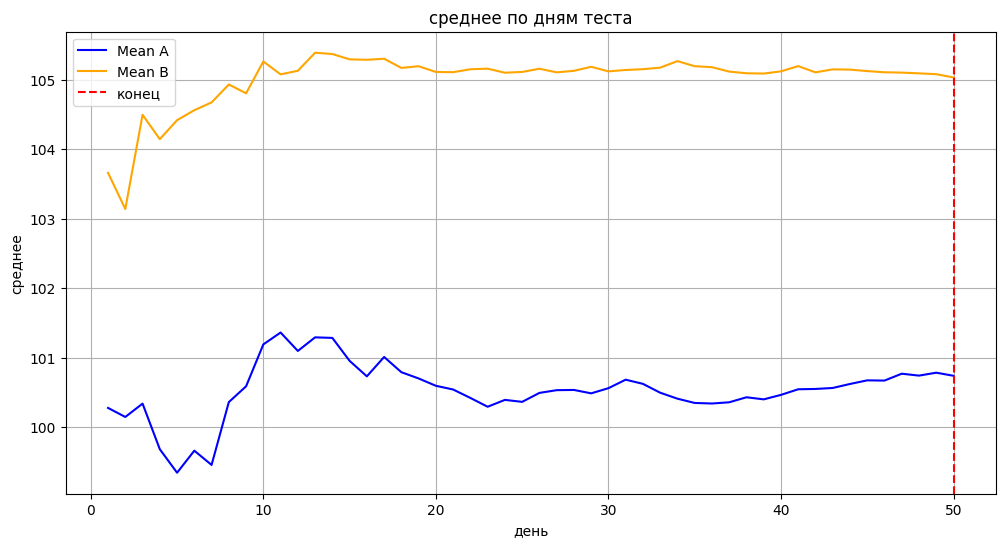

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df_sample['day'], df_sample['mean_A'], label='Mean A', color='blue')
plt.plot(df_sample['day'], df_sample['mean_B'], label='Mean B', color='orange')
plt.axvline(x=50, color='red', linestyle='--', label='конец')
plt.title('среднее по дням теста')
plt.xlabel('день')
plt.ylabel('среднее')
plt.legend()
plt.grid()
plt.show()

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

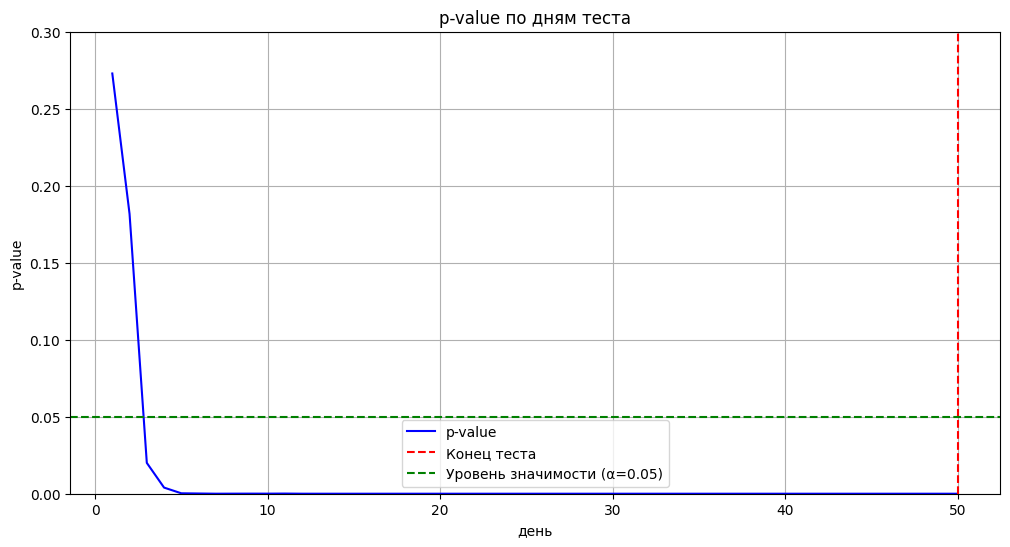

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df_sample['day'], df_sample['p-value'], label='p-value', color='b')
plt.axvline(x=50, color='red', linestyle='--', label='Конец теста')
plt.axhline(y=0.05, color='green', linestyle='--', label='Уровень значимости (α=0.05)')
plt.title('p-value по дням теста')
plt.xlabel('день')
plt.ylabel('p-value')
plt.ylim(0, 0.3)
plt.legend()
plt.grid()
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

Эксперимент № 1


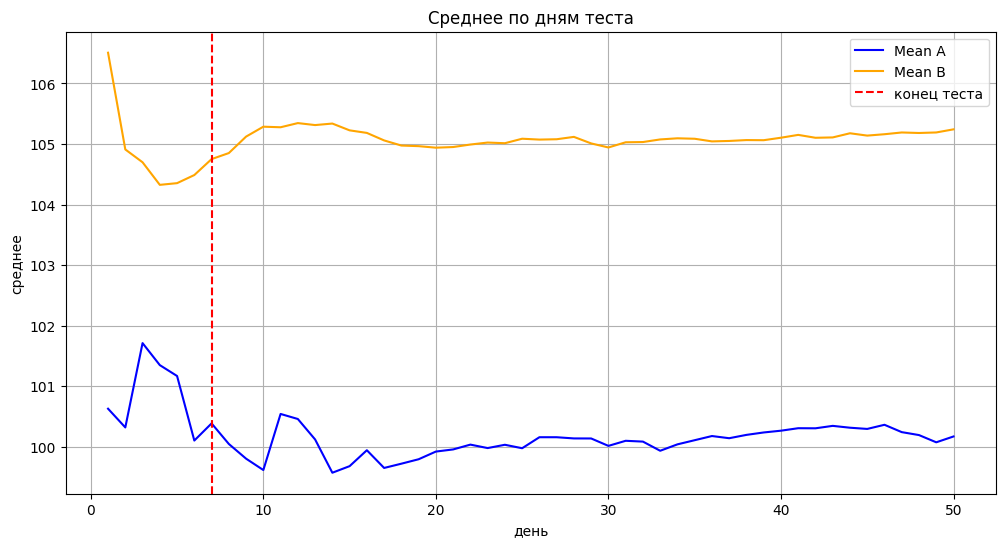

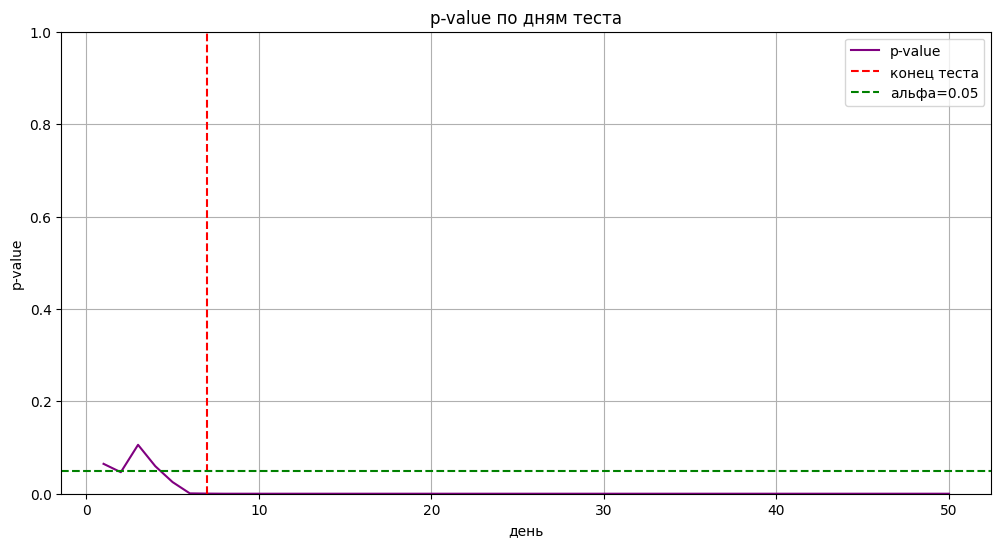

Эксперимент № 2


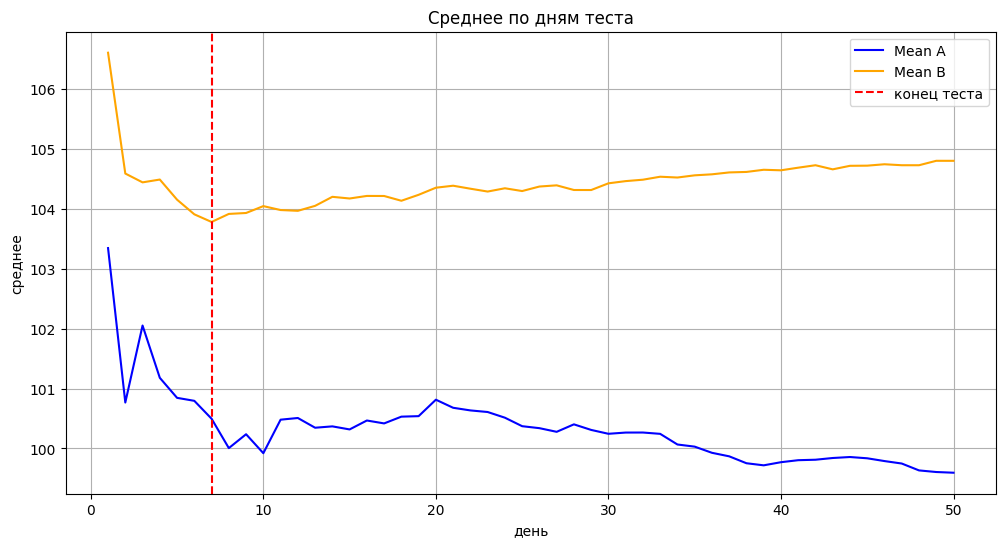

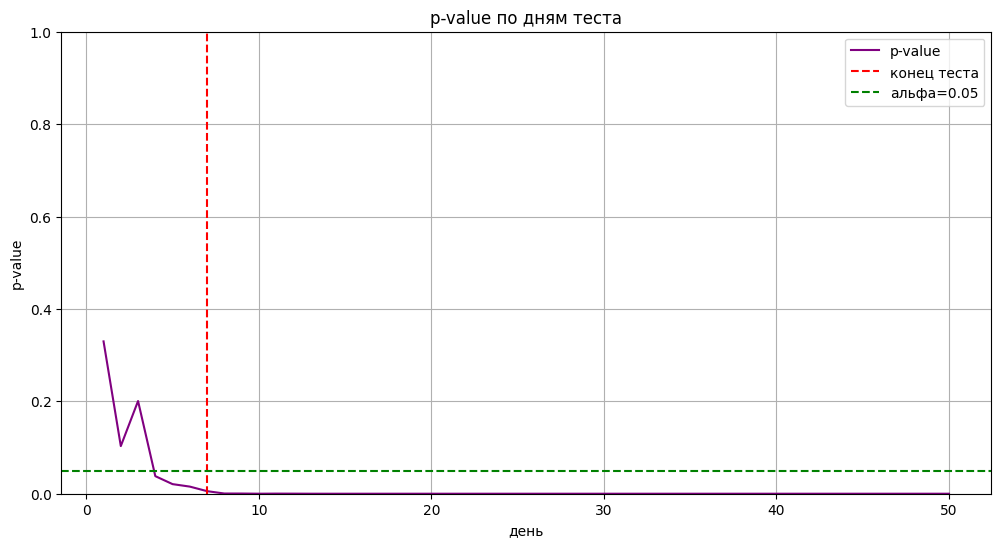

Эксперимент № 3


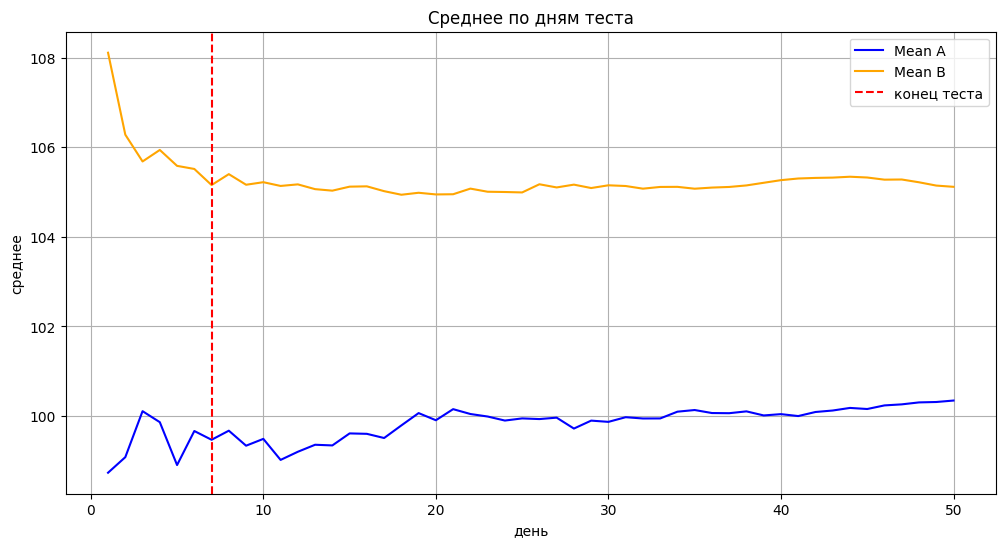

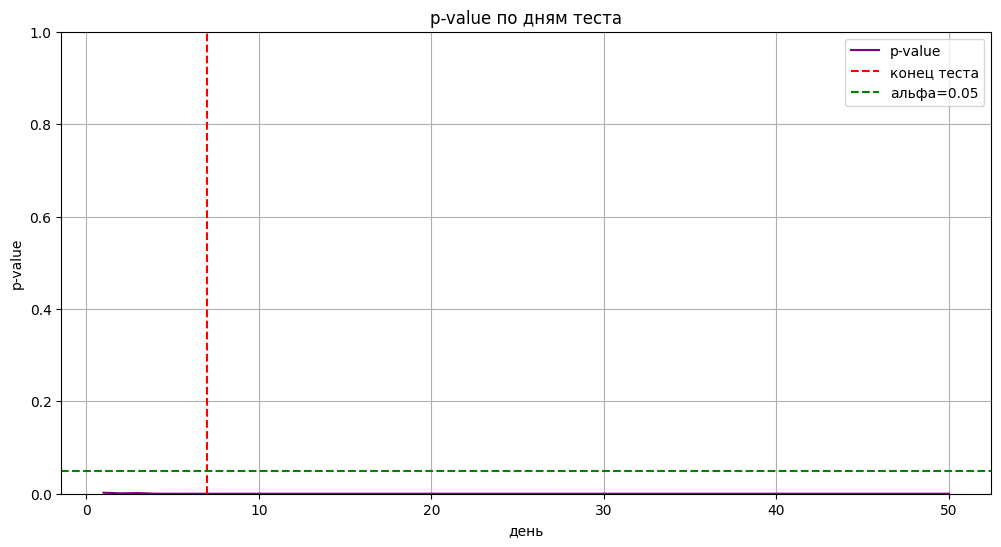

Эксперимент № 4


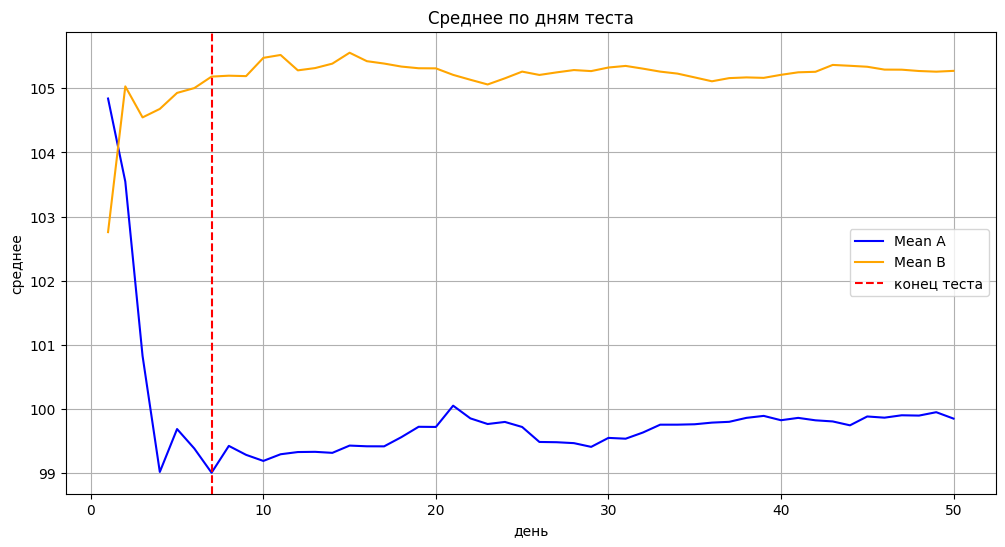

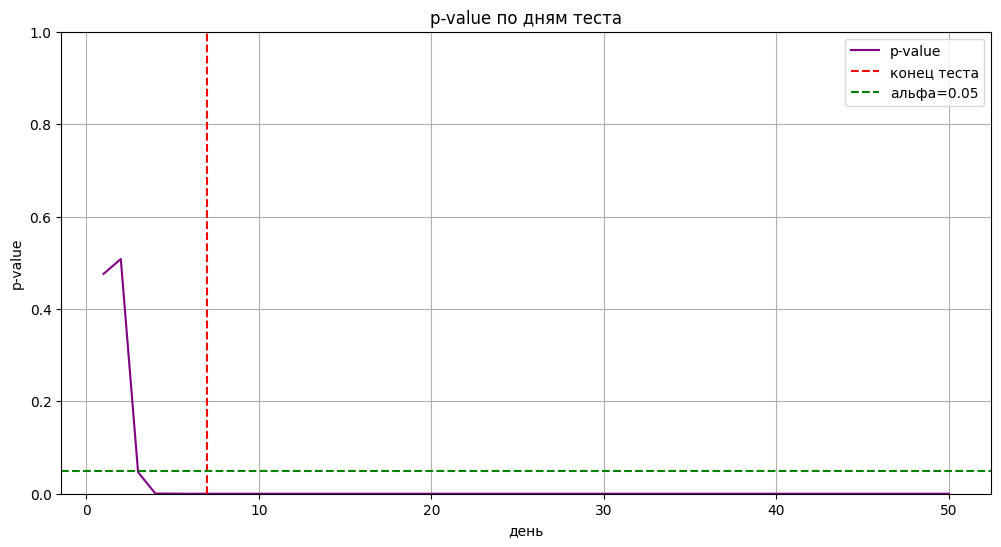

Эксперимент № 5


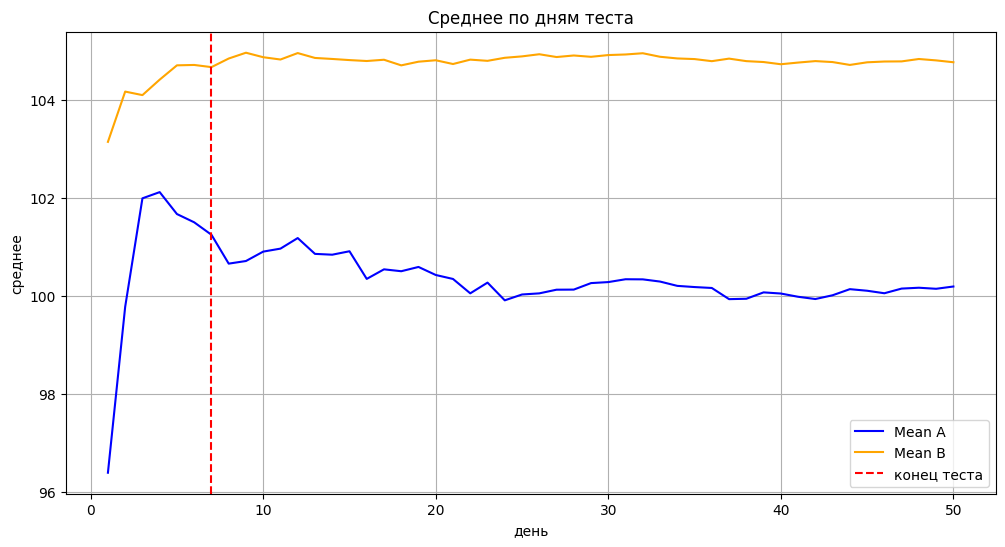

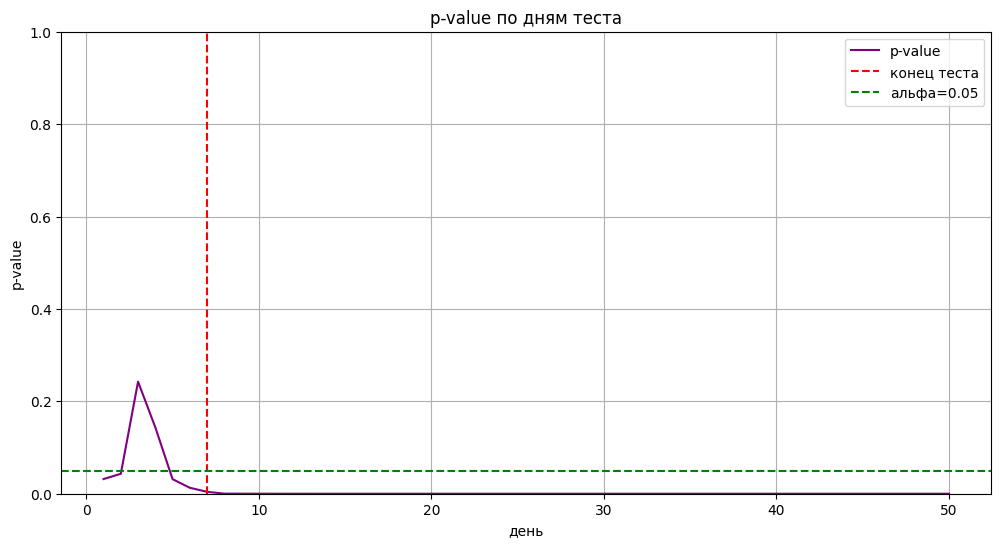

In [33]:
def ab_test(num_days=50, n_per_day=200, mu_A=100, sigma_A=40, mu_B=105, sigma_B=20, alpha=0.05):
    A = sts.norm.rvs(loc=mu_A, scale=sigma_A, size=n_per_day * num_days)
    B = sts.norm.rvs(loc=mu_B, scale=sigma_B, size=n_per_day * num_days)

    sample = {
        'day': [],
        'mean_A': [],
        'mean_B': [],
        'p-value': []
    }

    for day in range(1, num_days + 1):
        A_daily = A[:day * n_per_day]
        B_daily = B[:day * n_per_day]

        mean_A = np.mean(A_daily)
        mean_B = np.mean(B_daily)

        _, p_value = sts.ttest_ind(A_daily, B_daily)

        sample['day'].append(day)
        sample['mean_A'].append(mean_A)
        sample['mean_B'].append(mean_B)
        sample['p-value'].append(p_value)

    df_sample = pd.DataFrame(sample)

    plt.figure(figsize=(12, 6))
    plt.plot(df_sample['day'], df_sample['mean_A'], label='Mean A', color='blue')
    plt.plot(df_sample['day'], df_sample['mean_B'], label='Mean B', color='orange')
    plt.axvline(x=7, color='red', linestyle='--', label='конец теста')
    plt.title('Среднее по дням теста')
    plt.xlabel('день')
    plt.ylabel('среднее')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(df_sample['day'], df_sample['p-value'], label='p-value', color='purple')
    plt.axvline(x=7, color='red', linestyle='--', label='конец теста')
    plt.axhline(y=alpha, color='green', linestyle='--', label='альфа=0.05')
    plt.title('p-value по дням теста')
    plt.xlabel('день')
    plt.ylabel('p-value')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()
    plt.show()

for i in range(5):
    print(f"Эксперимент № {i + 1}")
    ab_test()

__Ответ:__ Результаты наглядно показывают, почему АБ тест должен "настояться". Например, в эксперименте 4 в первые несколько дней даже среднее в группе А выше чем в группе Б (в этом случае можно было бы ошибочно не отклонить нулевую гипотезу и признать, например, что изменения на сайте делать не следует). Как видим, до 7 дней разница средних может вести себя нестабильно и p-value принимает достаточно высокие значения ввиду большой вариативности данных.

Далее, начиная с 7го дня результаты только подтверждают корректность нашего расчета дней экспереминта: p-значения во всех экспериментах становятся менее критического уровня 0.05 и доказывают существенность различий средних.

Длительный тест (от 8 до 50 дней и более) уже не имеет особого смысла, результат в части разницы средних и p-value не меняется.

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [ ]:
# your code and thoughts here
# ♡ (´｡• ω •｡`) ♡

__в) [20 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости?

In [ ]:
# your code and thoughts here
# =^･ｪ･^=

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите?

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [ ]:
# your code and thoughts here
# C (・_・)ノ